In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('Dane_chlodziarki.xlsx')
df.head()

,Czas [s],T3 [C],T5 [C],P1 [mbar],P2 [mbar],m1 [g],V1,V2,V3,korekta masy [g],masa mieszanki [g],masa mieszankki/15 [g/g],numer badania,Stan,IDa,IDc
0,0,28.191059,28.280225,12.297552,25.901674,364.321900,0,0,500,401.000000,15.000000,1.000000,1,1,2,5
1,1,28.247973,29.077961,13.754778,25.682053,353.719925,0,0,500,390.398129,4.398129,0.293209,1,1,2,5
2,2,28.359221,30.162530,15.167928,25.515988,353.178220,0,0,500,389.856528,3.856528,0.257102,1,1,2,5
3,3,28.493976,31.448852,16.376885,25.413141,353.768543,0,0,500,390.446955,4.446955,0.296464,1,1,2,5
4,4,28.629912,32.740435,17.481574,25.331754,353.935694,0,0,500,390.614210,4.614210,0.307614,1,1,2,5


In [3]:
copy_for_changes = df.copy()

In [4]:
numery_badania = copy_for_changes['numer badania'].unique()

In [5]:
list_of_experiment = []


In [6]:
for element in numery_badania:
    list_of_experiment.append(copy_for_changes[copy_for_changes['numer badania'] == element])    

In [7]:
def drawing_plots(x):
    m = x['masa mieszankki/15 [g/g]']
    t = x['Czas [s]']
    Pads = x['P2 [mbar]']
    Pevap = x['P1 [mbar]']
    temp = x['T3 [C]']
    temp2 = x['T5 [C]']
    IDa = x['IDa'].unique()
    IDc = x['IDc'].unique()
    os_t = np.arange(0, 3100, 200)


    if IDa == 1:
        material = 'SilicaGel '
    elif IDa == 2:
        material = 'SilicaGel+AL '
    elif IDa == 3:
        material = 'SilicaGel+NC '


    if IDc == 0:
        percentage = '0%'
    if IDc == 5:
        percentage = '5%'
    if IDc == 15:
        percentage = '15%'    
    
        

    f, (ax1, ax2, ax3) = plt.subplots(3,1)
    f.set_figwidth(10)
    f.set_figheight(8)

    ax1.plot(t, m, label =  'wykres masy '+ material + percentage)
    ax1.legend()
    ax1.grid(visible = True)
    ax1.set_xticks(os_t)
    
    ax2.plot(t, Pads)
    ax2.plot(t, Pevap)
    ax2.grid(visible=True)
    ax2.set_xticks(os_t)
        
    ax3.plot(t, temp, label = "T3 [C]")
    ax3.plot(t, temp2, label = 'T5 [C]')
    ax3.grid(visible=True)
    ax3.set_xticks(os_t)
    ax3.legend()

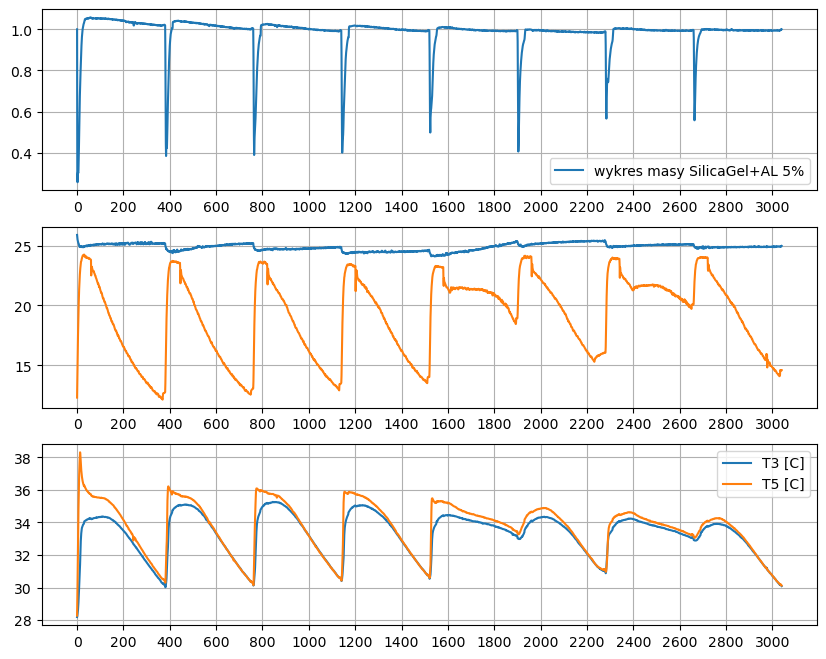

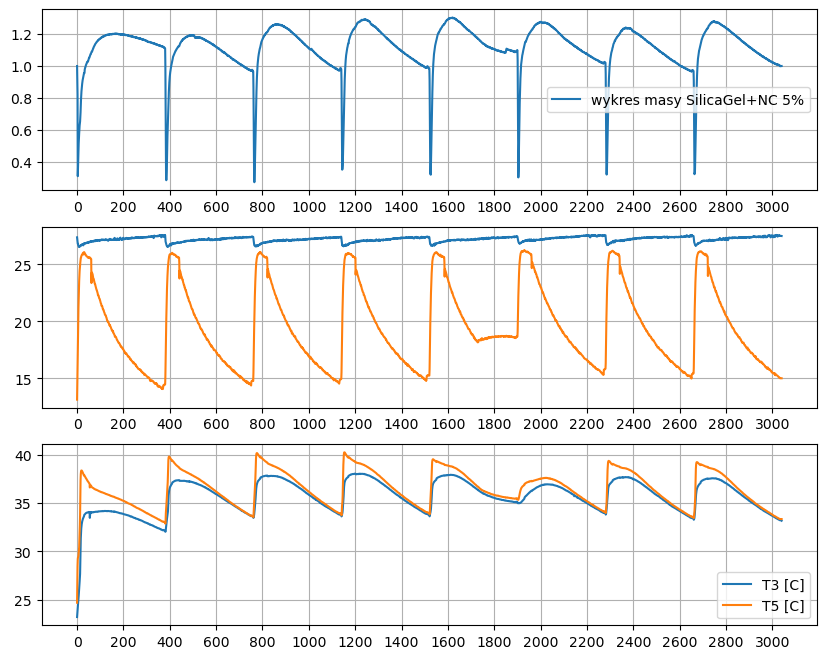

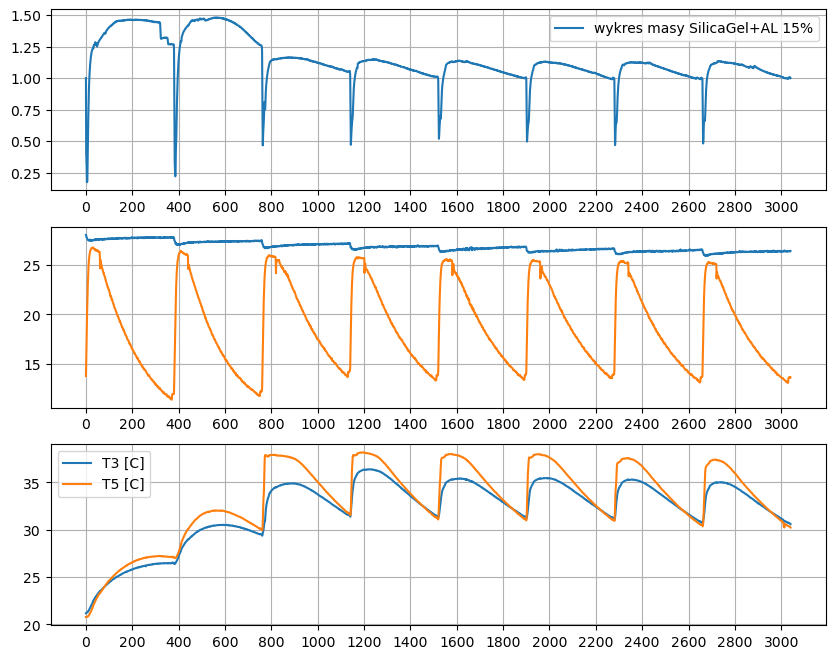

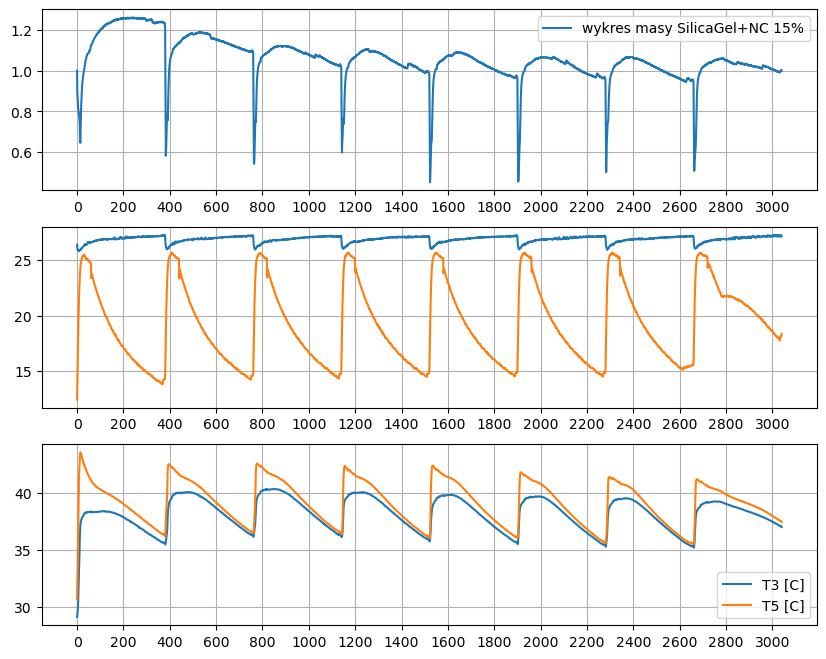

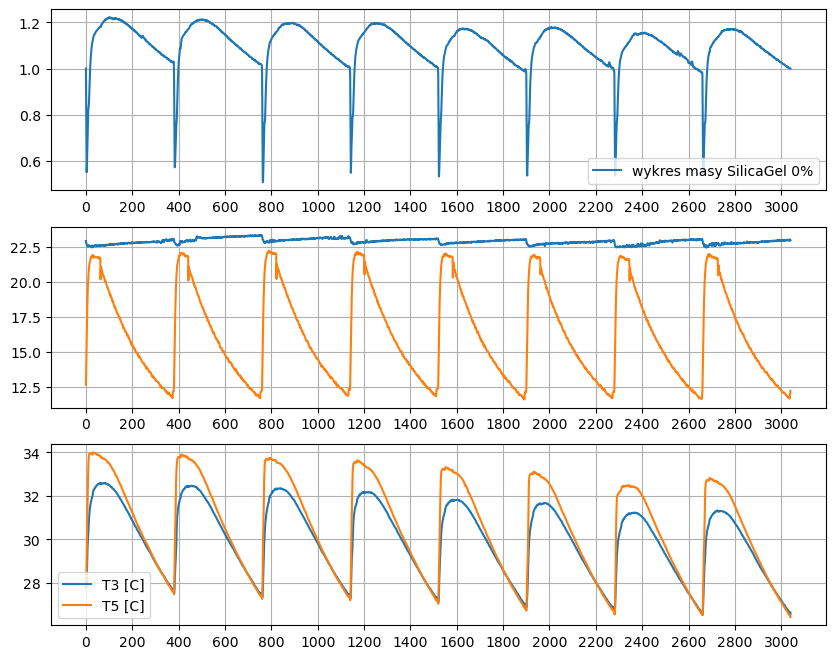

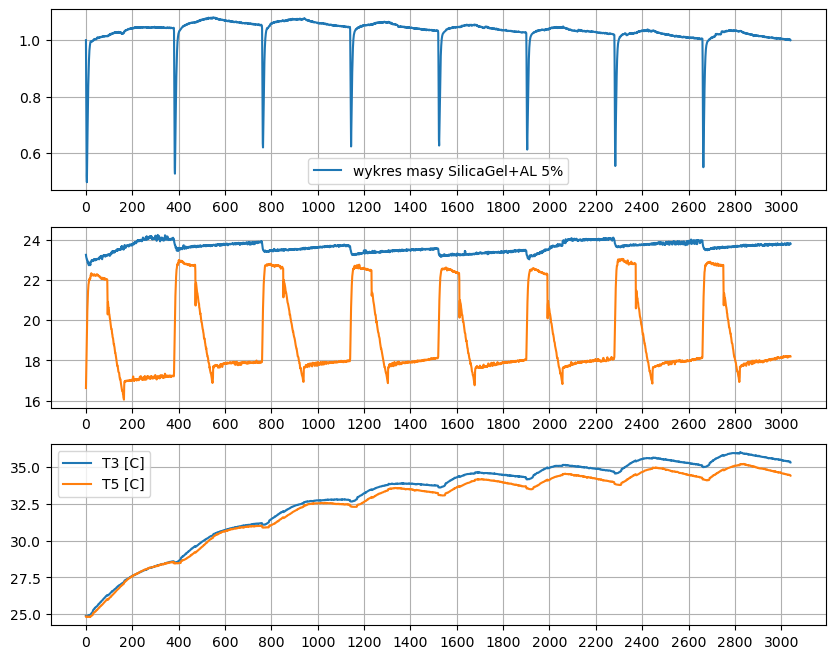

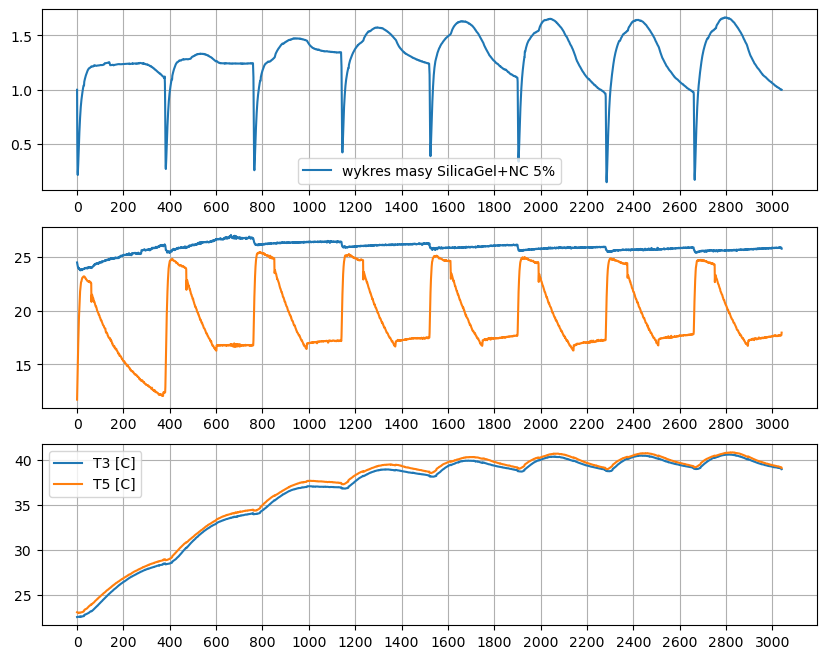

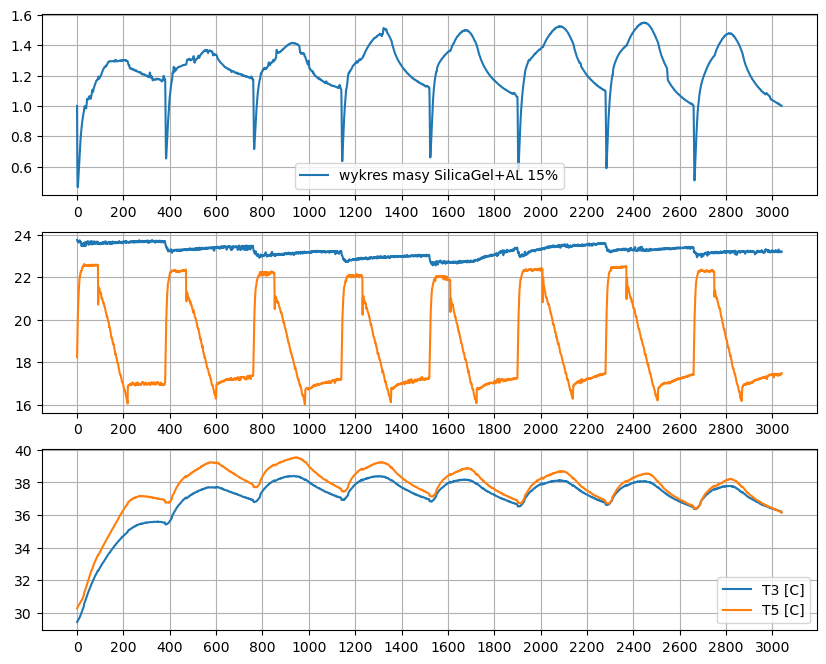

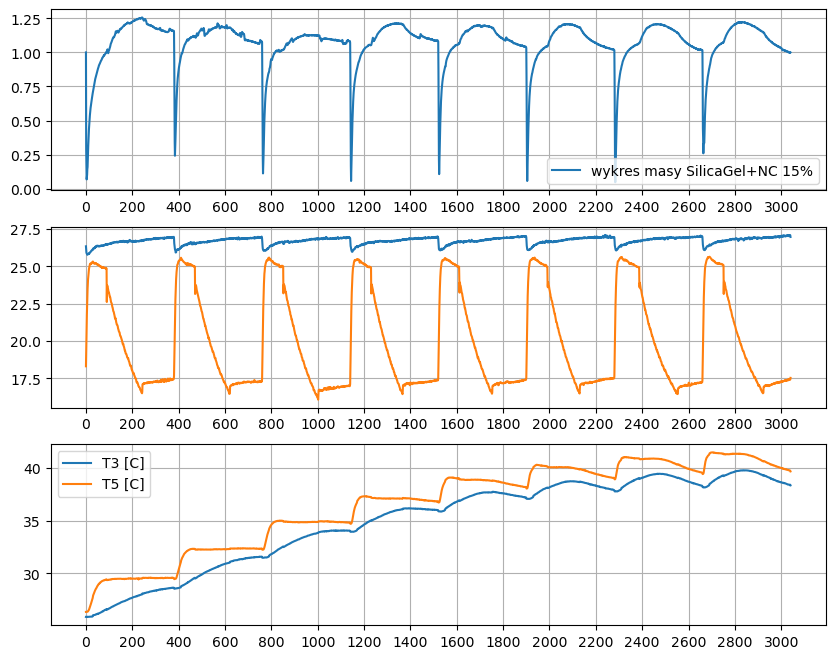

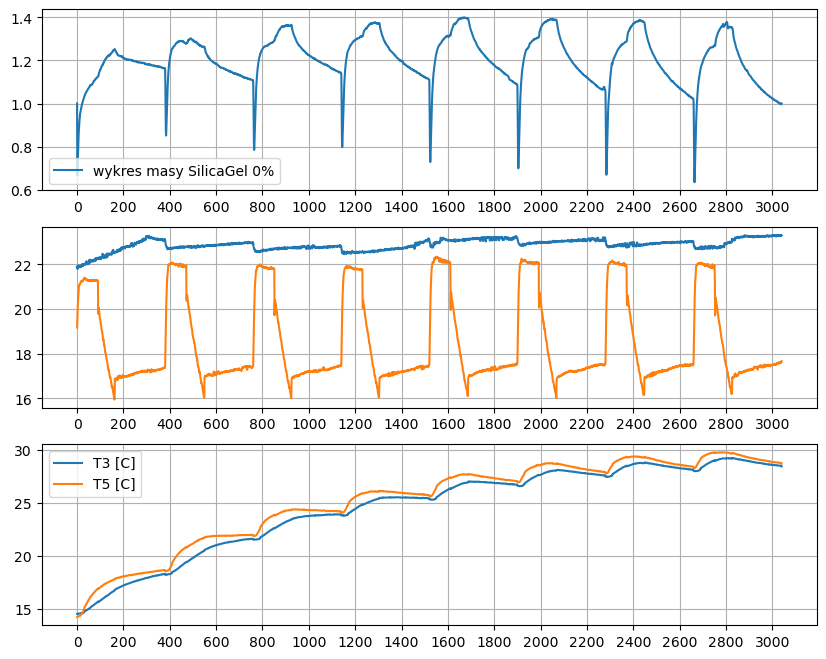

In [8]:
for element in list_of_experiment:
    drawing_plots(element)


In [9]:
copy_to_fix = copy_for_changes.copy()

In [10]:
copy_after_time_cut = copy_to_fix.drop(copy_to_fix[copy_to_fix['Czas [s]'] > 1600].index)


Plik skrócony do 1600 sekund, przed usunieciem wartosci m mniejszych od 0.8


In [14]:


after_time_delete = copy_after_time_cut.drop(columns=['m1 [g]', 'V1', 'V2', 'korekta masy [g]', 'masa mieszanki [g]', 'numer badania', 'Stan'])
file_excel = after_time_delete

file_excel.to_excel("Upload.xlsx")

next_upload = after_time_delete.copy()


In [15]:

next_upload['masa mieszankki/15 [g/g]'].mask(next_upload['masa mieszankki/15 [g/g]'] < 0.8, None, inplace=True)


Podmiana wartości 'm' mniejszych od 0.8 na NaN


In [17]:
next_upload.to_excel('Kolejny Upload(bez 0.8).xlsx')

In [11]:
to_upload_no = copy_after_time_cut.drop(columns=['m1 [g]', 'V1', 'V2', 'korekta masy [g]', 'masa mieszanki [g]', 'Stan'])

In [21]:
to_upload_no

,Czas [s],T3 [C],T5 [C],P1 [mbar],P2 [mbar],V3,masa mieszankki/15 [g/g],numer badania,IDa,IDc
0,0,28.191059,28.280225,12.297552,25.901674,500,1.000000,1,2,5
1,1,28.247973,29.077961,13.754778,25.682053,500,NaN,1,2,5
2,2,28.359221,30.162530,15.167928,25.515988,500,NaN,1,2,5
3,3,28.493976,31.448852,16.376885,25.413141,500,NaN,1,2,5
4,4,28.629912,32.740435,17.481574,25.331754,500,NaN,1,2,5
...,...,...,...,...,...,...,...,...,...,...
28965,1596,26.219095,27.279939,22.074849,23.106156,0,1.312959,10,1,0
28966,1597,26.228281,27.283177,22.071900,23.085329,0,1.314797,10,1,0
28967,1598,26.250153,27.291527,22.131038,23.093886,0,1.315368,10,1,0
28968,1599,26.248912,27.297577,22.149259,23.087119,0,1.312544,10,1,0


None
